In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.io import loadmat
import torch
# from pinn_fwi.tools import gaussian_filter_2d
from pyfwi_tools import model_resizing


model_name = "marmousi"

In [12]:
m_true = torch.load("data_model/marmousi_bl.bin").numpy()

# m_true = m_true['phi']    
  
vmin, vmax = m_true.min(), m_true.max()


In [13]:
run_name = "Sep_10_2023_08_29_33" 

In [14]:
path = "./results"
path = f"{path}/{run_name}"

m = np.load(f"{path}/m.npy")


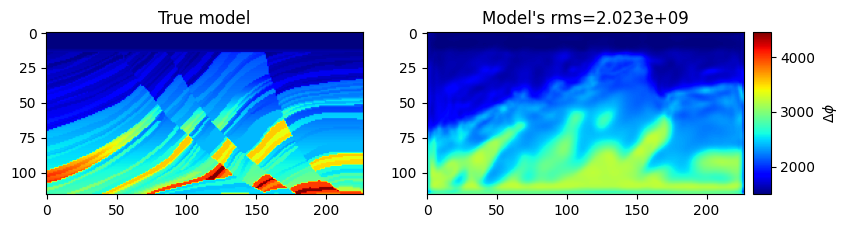

In [17]:
err = np.sum((m_true - m)**2)#/np.size(m_true)

fig,ax = plt.subplots(1, 2, figsize=(9, 4.5))
im = ax[0].imshow(m_true, cmap="jet", vmin=vmin, vmax=vmax)
ax[0].set_title("True model")

ax[1].imshow(m, cmap="jet", vmin=vmin, vmax=vmax)
ax[1].set_title(f"Model's rms={err:0.4}")

points = ax[1].get_position().get_points()
dy = points[1, 1] - points[0, 1]
cax = fig.add_axes([0.91, points[0, 1], 0.02, dy])
cax.yaxis.set_ticks_position("right")
cbar = fig.colorbar(im, cax=cax, orientation="vertical", 
                    extend="neither", label=r"$\Delta \phi$"
                    )
# fig.subplots_adjust(wspace=0.3)

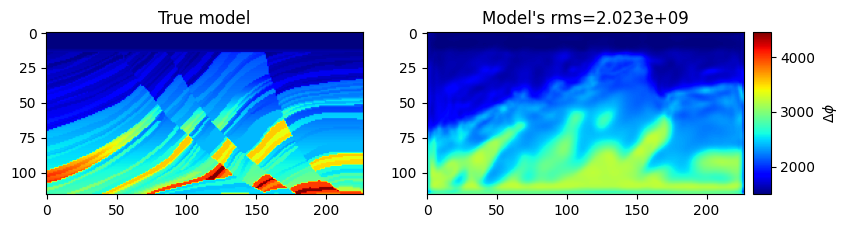

In [18]:
err = np.sum((m_true - m)**2)#/np.size(m_true)

fig,ax = plt.subplots(1, 2, figsize=(9, 4.5))
im = ax[0].imshow(m_true, cmap="jet", vmin=vmin, vmax=vmax)
ax[0].set_title("True model")

ax[1].imshow(m, cmap="jet", vmin=vmin, vmax=vmax)
ax[1].set_title(f"Model's rms={err:0.4}")

points = ax[1].get_position().get_points()
dy = points[1, 1] - points[0, 1]
cax = fig.add_axes([0.91, points[0, 1], 0.02, dy])
cax.yaxis.set_ticks_position("right")
cbar = fig.colorbar(im, cax=cax, orientation="vertical", 
                    extend="neither", label=r"$\Delta \phi$"
                    )
# fig.subplots_adjust(wspace=0.3)

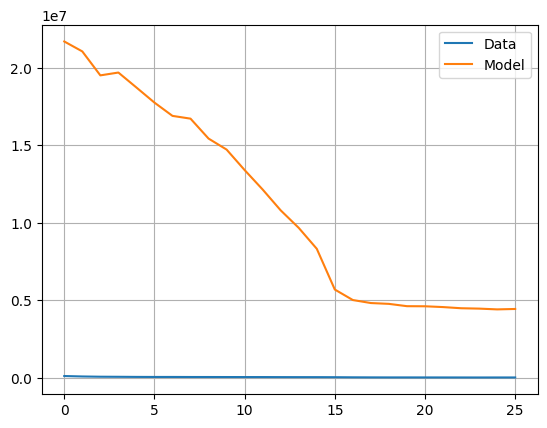

In [19]:
all_loss_data = np.load(f"{path}/all_loss_data.npy")
all_loss_model = np.load(f"{path}/all_loss_model.npy")

plt.plot(all_loss_data, label="Data")
plt.plot(all_loss_model, label="Model")
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Loss is 5.9811e+04')

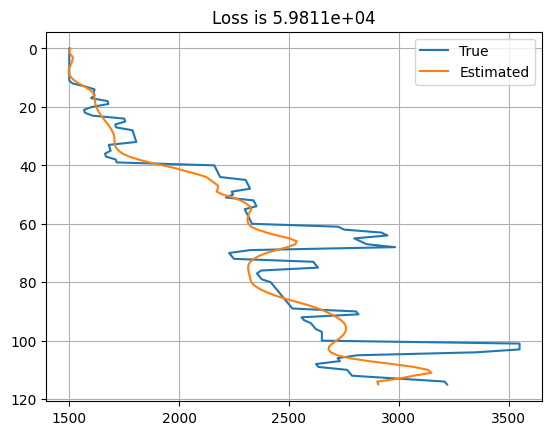

In [20]:

well_pos = [70, 150]
true_wells = m_true[:, well_pos]
estimated_wells = m[:, well_pos]

depth_idx = np.arange(true_wells.shape[0])
plt.plot(true_wells[:, 0], depth_idx, label="True")
plt.plot(estimated_wells[:, 0], depth_idx, label="Estimated")
plt.grid()
plt.legend()
plt.gca().invert_yaxis()

err_new = np.sum((true_wells - estimated_wells)**2)/np.size(true_wells)
plt.title(f"Loss is {err_new:0.5}")

Text(0.5, 1.0, 'Loss is 5.9811e+04')

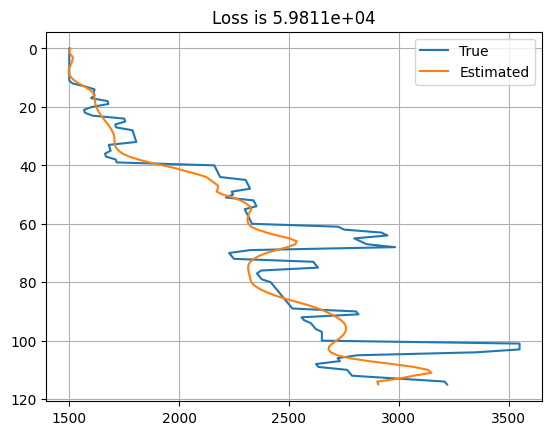

In [21]:
well_pos = [70, 150]
true_wells = m_true[:, well_pos]
estimated_wells = m[:, well_pos]

depth_idx = np.arange(true_wells.shape[0])
plt.plot(true_wells[:, 0], depth_idx, label="True")
plt.plot(estimated_wells[:, 0], depth_idx, label="Estimated")
plt.grid()
plt.legend()
plt.gca().invert_yaxis()

err_new = np.sum((true_wells - estimated_wells)**2)/np.size(true_wells)
plt.title(f"Loss is {err_new:0.5}")